# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

from sklearn.cross_validation import KFold

In [24]:
data = pd.read_csv("C:/Users/Pat.NOAGALLERY/Documents/data_sources/imdb_p6_sample.csv")

In [25]:
binary_columns = ["excellent", "great","love", "beautiful", "best", "hope", "groundbreaking", "amazing" ]
X = data[binary_columns]
y = data.rating


## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

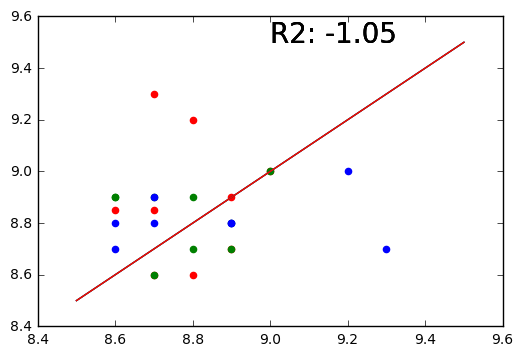

In [37]:
model = DecisionTreeRegressor(random_state=0)
cross_val_scores = cross_val_score(model, X, y, cv=cv)

cv = KFold(len(y), shuffle=True)


def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(model, cross_val_scores.mean().round(2))


## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

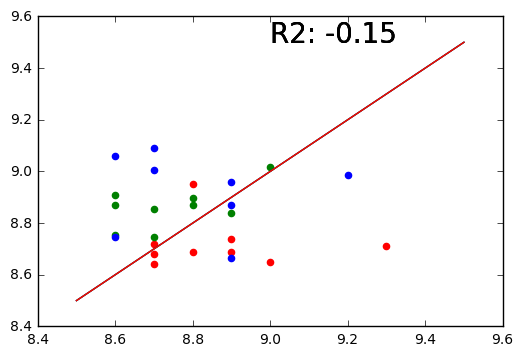

In [44]:
model = RandomForestRegressor(random_state=0)
cross_val_scores = cross_val_score(model, X, y, cv=cv)

cv = KFold(len(y), shuffle=True)


# def do_plot(model, m=None):
#     for fold, color in zip(cv, ['r', 'g', 'b']):
#         X_train = X.iloc[fold[0]]
#         X_test  = X.iloc[fold[1]]
#         y_train = y.iloc[fold[0]]
#         y_test  = y.iloc[fold[1]]
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         plt.scatter(y_test, y_pred, color=color)
#         plt.plot([8.5,9.5],[8.5,9.5])
#         plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(model, cross_val_scores.mean().round(2))


## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

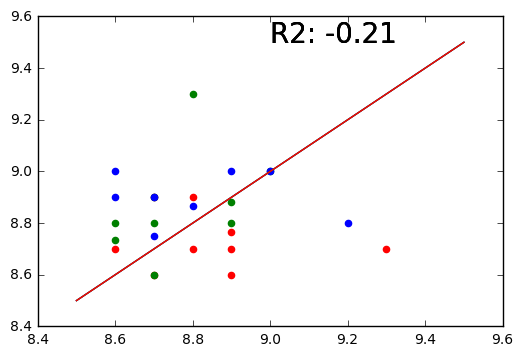

In [43]:
model = AdaBoostRegressor(random_state=0)
cross_val_scores = cross_val_score(model, X, y, cv=cv)

cv = KFold(len(y), shuffle=True)


# def do_plot(model, m=None):
#     for fold, color in zip(cv, ['r', 'g', 'b']):
#         X_train = X.iloc[fold[0]]
#         X_test  = X.iloc[fold[1]]
#         y_train = y.iloc[fold[0]]
#         y_test  = y.iloc[fold[1]]
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         plt.scatter(y_test, y_pred, color=color)
#         plt.plot([8.5,9.5],[8.5,9.5])
#         plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(model, cross_val_scores.mean().round(2))

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

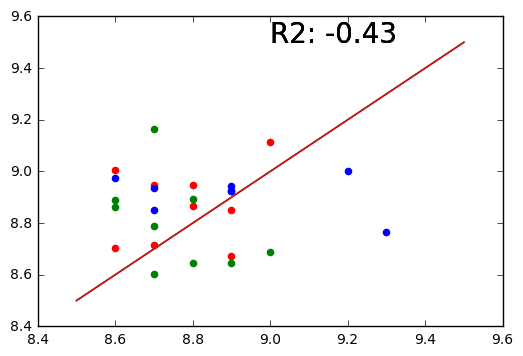

In [46]:
model = GradientBoostingRegressor(random_state=0)
cross_val_scores = cross_val_score(model, X, y, cv=cv)

cv = KFold(len(y), shuffle=True)


# def do_plot(model, m=None):
#     for fold, color in zip(cv, ['r', 'g', 'b']):
#         X_train = X.iloc[fold[0]]
#         X_test  = X.iloc[fold[1]]
#         y_train = y.iloc[fold[0]]
#         y_test  = y.iloc[fold[1]]
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         plt.scatter(y_test, y_pred, color=color)
#         plt.plot([8.5,9.5],[8.5,9.5])
#         plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(model, cross_val_scores.mean().round(2))

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.